In [19]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:


# Function to calculate correlations and mutual information
def calculate_statistics(data, target_column):
    results = []
    
    # Ensure the target column exists
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    # Loop through each column except the target column
    for col in data.columns:
        if col == target_column:
            continue

        print(f"Calculating statistics for '{col}'...")

        # Drop NA values for pairwise comparison
        valid_data = data[[col, target_column]].dropna()

        if len(valid_data) <= 2:
            # Append results
            results.append({
                'Parameter': col,
                'Pearson Correlation': None,
                'Pearson p-value': None,
                'Spearman Correlation': None,
                'Spearman p-value': None,
                'Mutual Information': None
            })
        else:

            x = valid_data[col]
            y = valid_data[target_column]

            # Calculate Pearson correlation
            pearson_corr, pearson_pval = pearsonr(x, y)

            # Calculate Spearman's rank correlation
            spearman_corr, spearman_pval = spearmanr(x, y)

            # Calculate mutual information
            mi = mutual_info_regression(x.values.reshape(-1, 1), y)[0]

            # Append results
            results.append({
                'Parameter': col,
                'Pearson Correlation': pearson_corr,
                'Pearson p-value': pearson_pval,
                'Spearman Correlation': spearman_corr,
                'Spearman p-value': spearman_pval,
                'Mutual Information': mi
            })

    return pd.DataFrame(results)

# Example usage
if __name__ == "__main__":
    # Example DataFrame with urban form variables and temperature
    data = pd.DataFrame({
        'Building Area': [100, 150, 200, 250, 300],
        'Building Height': [10, 12, 15, 18, 20],
        'Vegetation Index': [0.3, 0.35, 0.4, 0.45, 0.5],
        'Temperature': [22, 24, 26, 25, 27]
    })

    target_column = 'Temperature'
    stats = calculate_statistics(data, target_column)
    print(stats)


Calculating statistics for 'Building Area'...
Calculating statistics for 'Building Height'...
Calculating statistics for 'Vegetation Index'...
          Parameter  Pearson Correlation  Pearson p-value  \
0     Building Area             0.904194         0.035082   
1   Building Height             0.882618         0.047417   
2  Vegetation Index             0.904194         0.035082   

   Spearman Correlation  Spearman p-value  Mutual Information  
0                   0.9          0.037386            0.183333  
1                   0.9          0.037386            0.183333  
2                   0.9          0.037386            0.250000  


Temperature

In [8]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

In [9]:
temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

Urban form

In [43]:
params = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_150.parquet')

In [44]:
params = params[params['station_id']!='FRTECH']
params.index = params['station_id']

In [45]:
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
params = params.drop(to_remove, axis=1)

In [46]:
time = '2023-08-22 04:00:00+00:00'

In [47]:
params = params.merge(temp[time], left_on='station_id', right_on='station_id',how='inner')

In [48]:
params['BuMVE_3D_skew']

station_id
FRASHA   NaN
FRBETZ   NaN
FRBRUH   NaN
FRDIET   NaN
FRDREI   NaN
FRFRIE   NaN
FRGART   NaN
FRGLBA   NaN
FRGUNT   NaN
FRHAID   NaN
FRHBHF   NaN
FRHERD   NaN
FRHOCH   NaN
FRHOLZ   NaN
FRIHOC   NaN
FRINST   NaN
FRKART   NaN
FRLAND   NaN
FRLORE   NaN
FRMERZ   NaN
FRMESS   NaN
FROWIE   NaN
FRPDAS   NaN
FRRIES   NaN
FRSEEP   NaN
FRSTGA   NaN
FRSTGE   NaN
FRSTUH   NaN
FRUNIK   NaN
FRUWIE   NaN
FRVAUB   NaN
FRWEIN   NaN
FRWILD   NaN
FRWITT   NaN
FRWSEE   NaN
FRZAHR   NaN
Name: BuMVE_3D_skew, dtype: float64

In [17]:
stats = calculate_statistics(params, time)

Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'BuHt_mode'...
Calculating statistics for '

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calcu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuVol_3D_mode'...
Calculating statistics for 'BuVol_3D_IQR'...
Calculating statistics for 'BuVol_3D_MAD'...
Calculating statistics for 'BuVol_3D_skew'...
Calculating statistics for 'BuSA_3D_count'...
Calculating statistics for 'BuSA_3D_mean'...
Calculating statistics for 'BuSA_3D_median'...
Calculating statistics for 'BuSA_3D_std'...
Calculating statistics for 'BuSA_3D_min'...
Calculating statistics for 'BuSA_3D_max'...
Calculating statistics for 'BuSA_3D_sum'...
Calculating statistics for 'BuSA_3D_nunique'...
Calculating statistics for 'BuSA_3D_mode'...
Calculating statistics for 'BuSA_3D_IQR'...
Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calculating statistics for 'StrLen_mean'...
Calculating statistics for 'StrLen_median'...
Calculating statistics for 'StrLen_std'...
Calculating statistics for 'StrLen_min'...
Calculating statistics for 'StrLen_max'...
Calculating st

In [18]:
# sort stats by mutual information
stats.sort_values(by='Mutual Information', ascending=False).head(50)

Parameter  Pearson Correlation  Pearson p-value  \
664   BuSWA_3D_median             0.772546     1.384983e-07   
763          StrH_max             0.749354     2.901875e-06   
663     BuSWA_3D_mean             0.744701     6.709384e-07   
783        StrHW_mean             0.746920     3.254084e-06   
784      StrHW_median             0.760831     1.660836e-06   
760       StrH_median             0.667652     7.595556e-05   
352   BuFra_3D_median            -0.577744     4.302516e-04   
742       StrOpe_mode            -0.569161     1.029446e-03   
31          BuPer_max             0.627315     4.230045e-05   
759         StrH_mean             0.718300     1.144896e-05   
691      BuVol_3D_max             0.580208     4.010990e-04   
665      BuSWA_3D_std             0.562047     6.642358e-04   
736     StrOpe_median            -0.497667     5.136623e-03   
667      BuSWA_3D_max             0.570562     5.262372e-04   
872    StrBet1200_sum             0.551535     1.581786e-03   
787         StrHW_max             0.551091     1.946260e-03   
430      BuFF_3D_mode            -0.283615     1.097174e-01   
16        BuHt_median             0.602894     2.045943e-04   
426       BuFF_3D_min            -0.283615     1.097174e-01   
668      BuSWA_3D_sum             0.651644     1.670571e-05   
128         BuCWA_sum             0.651426     1.685202e-05   
764          StrH_sum             0.609428     3.506607e-04   
526       BuPerC_mode            -0.596639     2.475587e-04   
522        BuPerC_min            -0.596639     2.475587e-04   
378         BuSqu_min            -0.596639     2.475587e-04   
382        BuSqu_mode            -0.596639     2.475587e-04   
19           BuHt_max             0.600833     2.179525e-04   
704       BuSA_3D_sum             0.713899     1.016216e-06   
688   BuVol_3D_median             0.363491     3.758881e-02   
257         BuSWR_std             0.558166     4.041006e-04   
983        StrDeg_IQR            -0.161298     3.944807e-01   
931     StrCyc400_max             0.571363     9.740151e-04   
813    StrLin_nunique             0.533755     2.383893e-03   
310        BuCir_mode            -0.582111     3.797940e-04   
306         BuCir_min            -0.582111     3.797940e-04   
700    BuSA_3D_median             0.325719     6.434611e-02   
147        BuElo_mean            -0.440240     7.209982e-03   
692      BuVol_3D_sum             0.694381     2.633421e-06   
927    StrCyc400_mean             0.595919     5.113138e-04   
780         StrHD_MAD             0.629291     6.797690e-03   
17           BuHt_std             0.255935     1.505435e-01   
68      BuCCD_std_sum             0.619028     5.702931e-05   
848    StrClo1200_sum             0.539664     2.085254e-03   
713        StrLen_std            -0.417864     2.692031e-02   
928  StrCyc400_median             0.609038     3.545779e-04   
502        BuSpi_mode            -0.584144     3.581528e-04   
498         BuSpi_min            -0.584144     3.581528e-04   
187          BuFF_max             0.429356     1.265005e-02   
773         StrHD_std             0.603262     1.104758e-03   
943    StrCyc1200_max             0.582784     7.263421e-04   

     Spearman Correlation  Spearman p-value  Mutual Information  
664              0.789087      4.868094e-08            0.524963  
763              0.794089      2.726142e-07            0.511858  
663              0.785995      5.959975e-08            0.478695  
783              0.783744      4.944852e-07            0.455495  
784              0.776847      7.226675e-07            0.428523  
760              0.719212      1.102510e-05            0.407326  
352             -0.715909      2.814377e-06            0.391316  
742             -0.664737      6.156025e-05            0.390901  
31               0.629601      3.889458e-05            0.381880  
759              0.756650      2.042349e-06            0.370837  
691              0.737968      9.537697e-07            0.364158  
665   

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/1135583305.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params['BuFra_3D_median'][i], params[time][i]))


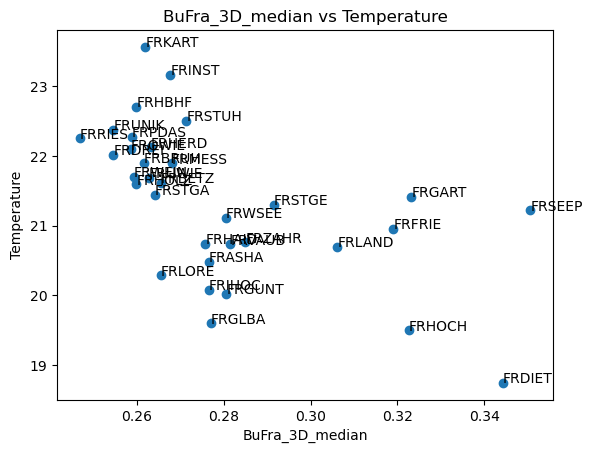

In [20]:
# plot params['BuFra_3D_median'] with temp and label by station_id

plt.scatter(params['BuFra_3D_median'], params[time])
plt.xlabel('BuFra_3D_median')
plt.ylabel('Temperature')
plt.title('BuFra_3D_median vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params['BuFra_3D_median'][i], params[time][i]))

plt.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/7037039.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


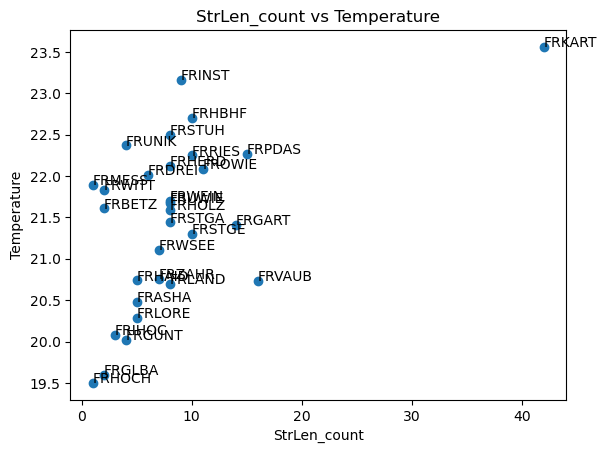

In [21]:
# plot params['BuFra_3D_median'] with temp and label by station_id

var = 'StrLen_count'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/1345998645.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


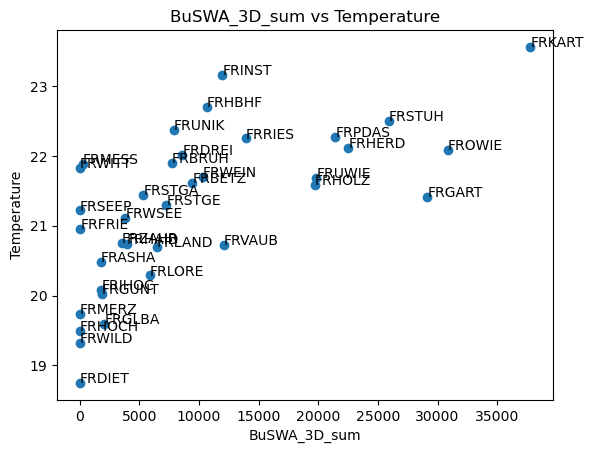

In [22]:
var = 'BuSWA_3D_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/568291608.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


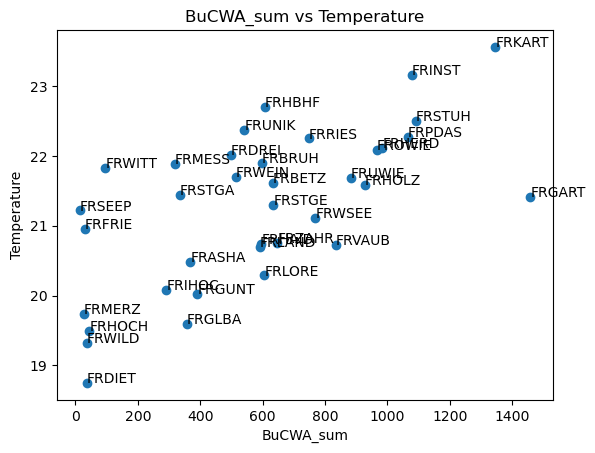

In [23]:
var = 'BuCWA_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()

In [24]:
# select stats where mutual information is higher than 0.1
selected_stats = stats[stats['Mutual Information']>0.2]

In [25]:
len(selected_stats)

126

In [26]:
selected_stats

Parameter  Pearson Correlation  Pearson p-value  \
1                 BuIBD            -0.322065     6.323355e-02   
15            BuHt_mean             0.581030     3.917693e-04   
16          BuHt_median             0.602894     2.045943e-04   
17             BuHt_std             0.255935     1.505435e-01   
19             BuHt_max             0.600833     2.179525e-04   
31            BuPer_max             0.627315     4.230045e-05   
32            BuPer_sum             0.599531     1.115093e-04   
43            BuLAL_max             0.631032     3.689085e-05   
44            BuLAL_sum             0.605918     8.995352e-05   
49           BuLAL_skew             0.420478     1.066672e-02   
56       BuCCD_mean_sum             0.586985     1.678496e-04   
68        BuCCD_std_sum             0.619028     5.702931e-05   
85           BuCor_skew             0.593326     1.722495e-04   
113           BuCCo_std             0.566149     3.193780e-04   
120           BuCCo_MAD             0.699084     2.107896e-06   
127           BuCWA_max             0.624335     4.714495e-05   
128           BuCWA_sum             0.651426     1.685202e-05   
147          BuElo_mean            -0.440240     7.209982e-03   
162           BuERI_min            -0.535758     7.585860e-04   
166          BuERI_mode            -0.535758     7.585860e-04   
183           BuFF_mean             0.161171     3.702326e-01   
184         BuFF_median             0.051340     7.766107e-01   
187            BuFF_max             0.429356     1.265005e-02   
197            BuFD_std             0.331523     4.824597e-02   
221           BuShI_std             0.582729     1.920996e-04   
228           BuShI_MAD             0.666733     8.999848e-06   
233           BuSqC_std             0.283605     9.370069e-02   
255          BuSWR_mean             0.555426     4.374942e-04   
257           BuSWR_std             0.558166     4.041006e-04   
264           BuSWR_MAD             0.512223     1.404740e-03   
292       StrAli_median            -0.496211     2.084542e-03   
305           BuCir_std             0.273250     1.238954e-01   
306           BuCir_min            -0.582111     3.797940e-04   
310          BuCir_mode            -0.582111     3.797940e-04   
318        BuHem_3D_min            -0.157323     3.819167e-01   
322       BuHem_3D_mode            -0.157323     3.819167e-01   
329        BuCon_3D_std             0.127121     4.808313e-01   
352     BuFra_3D_median            -0.577744     4.302516e-04   
375          BuSqu_mean            -0.136706     4.480855e-01   
377           BuSqu_std             0.329507     6.112873e-02   
378           BuSqu_min            -0.596639     2.475587e-04   
382          BuSqu_mode            -0.596639     2.475587e-04   
390       BuCube_3D_min            -0.143200     4.266064e-01   
394      BuCube_3D_mode            -0.143200     4.266064e-01   
426         BuFF_3D_min            -0.283615     1.097174e-01   
430        BuFF_3D_mode            -0.283615     1.097174e-01   
450          BuProx_min            -0.614685     1.412656e-04   
454         BuProx_mode            -0.614685     1.412656e-04   
473            BuEx_std             0.492857     3.567904e-03   
498           BuSpi_min            -0.584144     3.581528e-04   
502          BuSpi_mode            -0.584144     3.581528e-04   
521          BuPerC_std             0.329507     6.112873e-02   
522          BuPerC_min            -0.596639     2.475587e-04   
526         BuPerC_mode            -0.596639     2.475587e-04   
534         BuCf_3D_min            -0.143200     4.266064e-01   
538        BuCf_3D_mode            -0.143200     4.266064e-01   
593          BuDisp_std             0.507685     2.562000e-03   
604    BuDisp_3D_median             0.229728     1.984135e-01   
659      BuRough_3D_IQR            -0.123327     5.086315e-01   
663       BuSWA_3D_mean             0.744701     6.709384e-07   
664     BuSWA_3D_median             0.772546     

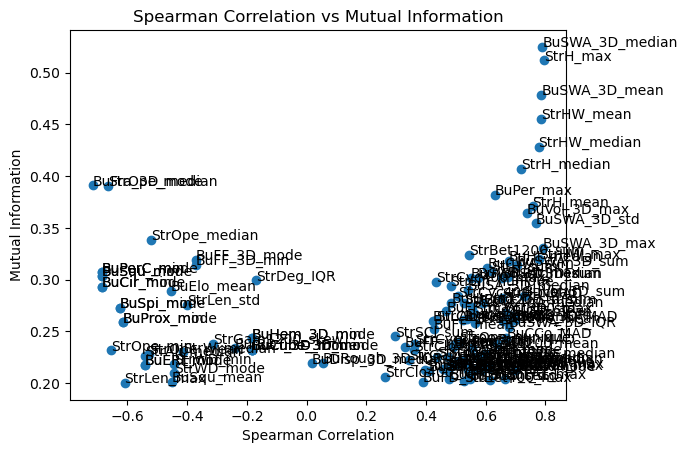

In [27]:
# plot spearman correlation and mutual information on plot for selected stats
# colour by groups

plt.scatter(selected_stats['Spearman Correlation'], selected_stats['Mutual Information'])
plt.xlabel('Spearman Correlation')
plt.ylabel('Mutual Information')
plt.title('Spearman Correlation vs Mutual Information') 

for i, txt in enumerate(selected_stats['Parameter']):
    plt.annotate(txt, (selected_stats['Spearman Correlation'].iloc[i], selected_stats['Mutual Information'].iloc[i]))
    
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
params_scaled = scaler.fit_transform(params[selected_stats['Parameter']])
params_scaled = pd.DataFrame(params_scaled, columns=selected_stats['Parameter'], index=params.index)
# remove columns with more than 7 NaN values
params_scaled = params_scaled.dropna(thresh=params_scaled.shape[0] - 7, axis=1)

In [89]:
# do a factor analysis of every variable in selected stats

from sklearn.decomposition import FactorAnalysis

X_scaled = params_scaled.dropna()

# Step 2: Determine the number of factors (e.g., set manually or use eigenvalues)
n_factors = 12  # Example: Choose 5 factors

# Step 3: Perform Factor Analysis
fa = FactorAnalysis(n_components=n_factors, random_state=0)
fa.fit(X_scaled)

# Step 4: Analyze Results
factor_loadings = pd.DataFrame(fa.components_.T, index=X_scaled.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Display the factor loadings
print(factor_loadings)


                    Factor 1  Factor 2  Factor 3  Factor 4      Factor 5  \
Parameter                                                                  
BuIBD              -0.225587 -0.019805  0.030501 -0.089479  2.735273e-03   
BuHt_mean           0.331848 -0.213947 -0.384929 -0.013704  1.961155e-01   
BuHt_median         0.305028 -0.185425 -0.415266  0.040599  2.024601e-01   
BuHt_std           -0.019707 -0.358750 -0.248978  0.008875  6.751514e-02   
BuHt_max            0.218454 -0.291116 -0.278836 -0.106931  4.713406e-02   
BuPer_max           0.148666 -0.740763 -0.177524 -0.111418 -1.508525e-02   
BuPer_sum           0.525406  0.102926 -0.073333  0.235174  1.044786e-01   
BuLAL_max           0.184260 -0.670426 -0.045036 -0.257448  9.751565e-03   
BuLAL_sum           0.539923  0.104934 -0.050917  0.213565  8.118378e-02   
BuLAL_skew          0.279401 -0.122406 -0.161244  0.411133  7.178611e-02   
BuCCD_mean_sum      0.526930  0.121636 -0.023233  0.236972  4.036713e-02   
BuCCD_std_su

In [90]:
# for each factor, print the top 5 highest loadings
factor_loadings_abs = factor_loadings.abs()

for i in range(n_factors):
    print(factor_loadings_abs.nlargest(5, f'Factor {i+1}'))


                Factor 1  Factor 2  Factor 3  Factor 4      Factor 5  \
Parameter                                                              
StrLen_count     1.01157  0.124848  0.187236  0.015385  2.056770e-09   
StrLen_nunique   1.01157  0.124848  0.187236  0.015385  2.056770e-09   
StrW_count       1.01157  0.124848  0.187236  0.015385  2.056770e-09   
StrOpe_count     1.01157  0.124848  0.187236  0.015385  2.056770e-09   
StrLin_count     1.01157  0.124848  0.187236  0.015385  2.056770e-09   

                    Factor 6      Factor 7      Factor 8      Factor 9  \
Parameter                                                                
StrLen_count    6.466776e-10  3.220772e-11  1.852016e-11  2.172631e-12   
StrLen_nunique  6.466776e-10  3.220772e-11  1.852016e-11  2.172631e-12   
StrW_count      6.466776e-10  3.220772e-11  1.852016e-11  2.172631e-12   
StrOpe_count    6.466776e-10  3.220772e-11  1.852016e-11  2.172631e-12   
StrLin_count    6.466776e-10  3.220772e-11  1.85201

In [29]:
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")

corr = params_scaled.corr()
long_df = corr.reset_index().melt(id_vars='Parameter', var_name='Variable', value_name='Correlation')

# Create the heatmap using Altair
heatmap = alt.Chart(long_df).mark_rect().encode(
    x=alt.X('Parameter:N', title='Variables', sort=None),  # Column names
    y=alt.Y('Variable:N', title='Variables', sort=None),  # Row names
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='viridis'), title='Correlation'),
    tooltip=['Parameter', 'Variable', 'Correlation']  # Tooltips for interactivity
).properties(
    width=1000,
    height=1000,
    title='Correlation Heatmap'
).interactive()

# Display the heatmap
heatmap.show()

alt.Chart(...)

In [30]:
# find groups of highly correlated variables

# Step 1: Define a threshold for correlation
threshold = 0.9

# Step 2: Find groups of highly correlated variables
groups = []

for i, row in corr.iterrows():
    group = [i]
    for j, value in row.items():
        if i != j and value > threshold:
            group.append(j)
    if len(group) > 1:
        group = sorted(group)
        groups.append(group)

# Display the groups
for group in groups:
    print(group)


['BuHt_mean', 'BuHt_median', 'StrH_mean']
['BuHt_mean', 'BuHt_median']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSA_3D_sum']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSWA_3D_sum']
['BuCCo_std', 'BuDisp_std', 'BuShI_std']
['BuCCo_MAD', 'BuShI_MAD']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSA_3D_sum']
['BuERI_min', 'BuERI_mode']
['BuERI_min', 'BuERI_mode']
['BuFF_mean', 'BuFF_median']
['BuFF_mean', 'BuFF_median']
['BuFD_std', 'BuSqC_std']
['BuCCo_std', 'BuDisp_std', 'BuShI_std']
['BuCCo_MAD', 'BuShI_MAD']
['BuCir_std', 'BuFD_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std']
['BuCir_std', 'BuPerC_std', 'BuSqC_std', 'BuSq

In [31]:
# remove duplicate groups from groups
unique_groups = []

for group in groups:
    if group not in unique_groups:
        unique_groups.append(group) 

unique_groups


[['BuHt_mean', 'BuHt_median', 'StrH_mean'],
 ['BuHt_mean', 'BuHt_median'],
 ['BuCWA_max', 'BuLAL_max', 'BuPer_max'],
 ['BuCCD_mean_sum',
  'BuCCD_std_sum',
  'BuCWA_sum',
  'BuLAL_sum',
  'BuPer_sum',
  'BuSA_3D_sum'],
 ['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum'],
 ['BuCCD_mean_sum',
  'BuCCD_std_sum',
  'BuCWA_sum',
  'BuLAL_sum',
  'BuPer_sum',
  'BuSWA_3D_sum'],
 ['BuCCo_std', 'BuDisp_std', 'BuShI_std'],
 ['BuCCo_MAD', 'BuShI_MAD'],
 ['BuERI_min', 'BuERI_mode'],
 ['BuFF_mean', 'BuFF_median'],
 ['BuFD_std', 'BuSqC_std'],
 ['BuCir_std', 'BuFD_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std'],
 ['BuCir_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std'],
 ['BuCir_min',
  'BuCir_mode',
  'BuPerC_min',
  'BuPerC_mode',
  'BuSqu_min',
  'BuSqu_mode'],
 ['BuCf_3D_min',
  'BuCf_3D_mode',
  'BuCube_3D_min',
  'BuCube_3D_mode',
  'BuHem_3D_min',
  'BuHem_3D_mode'],
 ['BuFF_3D_min', 'BuFF_3D_mode'],
 ['BuProx_min', 'BuProx_mode', 'BuSpi_min', 'BuSpi_mode'],
 ['BuDisp_std',

In [32]:
# add a group label to selected subsets for unique groups
selected_stats['Group'] = None

for i, row in selected_stats.iterrows():
    print(i)
    for group in unique_groups:
        if row['Parameter'] in group:
            selected_stats.loc[i, 'Group'] = str(group)

selected_stats

1
15
16
17
19
31
32
43
44
49
56
68
85
113
120
127
128
147
162
166
183
184
187
197
221
228
233
255
257
264
292
305
306
310
318
322
329
352
375
377
378
382
390
394
426
430
450
454
473
498
502
521
522
526
534
538
593
604
659
663
664
665
667
668
671
672
688
691
692
700
704
710
713
715
717
722
724
734
735
736
738
741
742
750
754
759
760
762
763
764
766
773
779
780
783
784
787
806
812
813
818
831
832
835
839
847
848
859
867
868
872
921
925
927
928
931
934
939
942
943
945
946
952
964
983
992


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/1746563441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['Group'] = None


Parameter  Pearson Correlation  Pearson p-value  \
1                 BuIBD            -0.322065     6.323355e-02   
15            BuHt_mean             0.581030     3.917693e-04   
16          BuHt_median             0.602894     2.045943e-04   
17             BuHt_std             0.255935     1.505435e-01   
19             BuHt_max             0.600833     2.179525e-04   
31            BuPer_max             0.627315     4.230045e-05   
32            BuPer_sum             0.599531     1.115093e-04   
43            BuLAL_max             0.631032     3.689085e-05   
44            BuLAL_sum             0.605918     8.995352e-05   
49           BuLAL_skew             0.420478     1.066672e-02   
56       BuCCD_mean_sum             0.586985     1.678496e-04   
68        BuCCD_std_sum             0.619028     5.702931e-05   
85           BuCor_skew             0.593326     1.722495e-04   
113           BuCCo_std             0.566149     3.193780e-04   
120           BuCCo_MAD             0.699084     2.107896e-06   
127           BuCWA_max             0.624335     4.714495e-05   
128           BuCWA_sum             0.651426     1.685202e-05   
147          BuElo_mean            -0.440240     7.209982e-03   
162           BuERI_min            -0.535758     7.585860e-04   
166          BuERI_mode            -0.535758     7.585860e-04   
183           BuFF_mean             0.161171     3.702326e-01   
184         BuFF_median             0.051340     7.766107e-01   
187            BuFF_max             0.429356     1.265005e-02   
197            BuFD_std             0.331523     4.824597e-02   
221           BuShI_std             0.582729     1.920996e-04   
228           BuShI_MAD             0.666733     8.999848e-06   
233           BuSqC_std             0.283605     9.370069e-02   
255          BuSWR_mean             0.555426     4.374942e-04   
257           BuSWR_std             0.558166     4.041006e-04   
264           BuSWR_MAD             0.512223     1.404740e-03   
292       StrAli_median            -0.496211     2.084542e-03   
305           BuCir_std             0.273250     1.238954e-01   
306           BuCir_min            -0.582111     3.797940e-04   
310          BuCir_mode            -0.582111     3.797940e-04   
318        BuHem_3D_min            -0.157323     3.819167e-01   
322       BuHem_3D_mode            -0.157323     3.819167e-01   
329        BuCon_3D_std             0.127121     4.808313e-01   
352     BuFra_3D_median            -0.577744     4.302516e-04   
375          BuSqu_mean            -0.136706     4.480855e-01   
377           BuSqu_std             0.329507     6.112873e-02   
378           BuSqu_min            -0.596639     2.475587e-04   
382          BuSqu_mode            -0.596639     2.475587e-04   
390       BuCube_3D_min            -0.143200     4.266064e-01   
394      BuCube_3D_mode            -0.143200     4.266064e-01   
426         BuFF_3D_min            -0.283615     1.097174e-01   
430        BuFF_3D_mode            -0.283615     1.097174e-01   
450          BuProx_min            -0.614685     1.412656e-04   
454         BuProx_mode            -0.614685     1.412656e-04   
473            BuEx_std             0.492857     3.567904e-03   
498           BuSpi_min            -0.584144     3.581528e-04   
502          BuSpi_mode            -0.584144     3.581528e-04   
521          BuPerC_std             0.329507     6.112873e-02   
522          BuPerC_min            -0.596639     2.475587e-04   
526         BuPerC_mode            -0.596639     2.475587e-04   
534         BuCf_3D_min            -0.143200     4.266064e-01   
538        BuCf_3D_mode            -0.143200     4.266064e-01   
593          BuDisp_std             0.507685     2.562000e-03   
604    BuDisp_3D_median             0.229728     1.984135e-01   
659      BuRough_3D_IQR            -0.123327     5.086315e-01   
663       BuSWA_3D_mean             0.744701     6.709384e-07   
664     BuSWA_3D_median             0.772546     

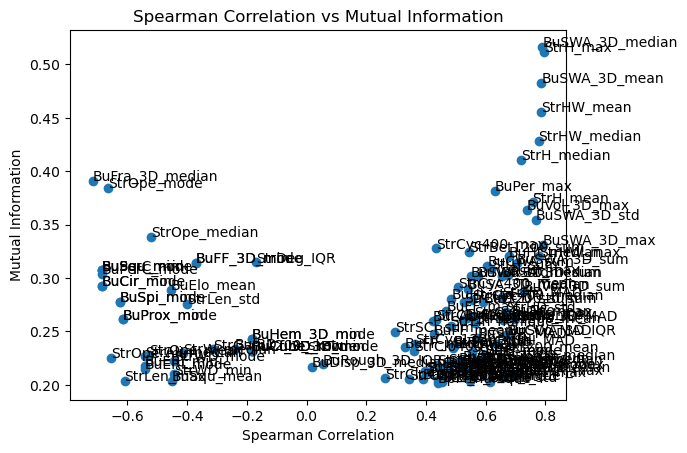

In [122]:
# plot spearman correlation and mutual information on plot for selected stats
# colour by groups

plt.scatter(selected_stats['Spearman Correlation'], selected_stats['Mutual Information'])
plt.xlabel('Spearman Correlation')
plt.ylabel('Mutual Information')
plt.title('Spearman Correlation vs Mutual Information') 

for i, txt in enumerate(selected_stats['Parameter']):
    plt.annotate(txt, (selected_stats['Spearman Correlation'].iloc[i], selected_stats['Mutual Information'].iloc[i]))

plt.show()

In [34]:
params

BuAdj      BuIBD  BuAre_count   BuAre_mean  BuAre_median  \
station_id                                                                
FRASHA      0.878049  24.276496           43   193.699062    122.522569   
FRBETZ      0.307692  21.604203           60   212.318337    196.075869   
FRBRUH      0.666667  29.950566           19  1606.605408   1346.405127   
FRDIET      1.000000        NaN            3   291.094241     16.297073   
FRDREI      0.333333  31.639435           36   326.081123    280.806173   
FRFRIE      1.000000  13.833826            3   201.725820    198.868510   
FRGART      0.105960  15.148889          163    61.858369     55.455365   
FRGLBA      0.857143  23.599061           49   146.479497    130.980334   
FRGUNT      0.854167  21.609553           52   142.101165    128.140500   
FRHAID      0.680000  19.529900           31   694.738714    479.730245   
FRHBHF      0.368421  14.069730           44   258.551253    186.020508   
FRHERD      0.480000  16.163692           85   214.321446    166.175036   
FRHOCH      1.000000  10.360428            3   177.894366    167.267580   
FRHOLZ      0.344828  16.994139           67   313.319073    192.805343   
FRIHOC      0.800000  30.459007           20   497.690377    387.616522   
FRINST      0.466667  15.947672           70   287.385002    180.716551   
FRKART      0.213333   9.217623           88   406.619173    199.857535   
FRLAND      0.397059  19.276014           77   148.805536    144.817179   
FRLORE      0.854545  21.893296           69   200.300489    187.827539   
FRMERZ      0.200000   2.852218            6    81.057967     79.275802   
FRMESS      1.000000  33.065905            8  1301.084101   1049.774845   
FROWIE      0.436782  13.861507           97   206.198245    174.684787   
FRPDAS      0.310345  23.102757           44   735.952652    233.205106   
FRRIES      0.405405  20.281402           43   411.369286    314.072701   
FRSEEP      1.000000        NaN            2   159.834750    159.834750   
FRSTGA      0.421053  37.318603           29   229.623502    173.766939   
FRSTGE      0.602564  16.226004           87   146.601721    107.905698   
FRSTUH      0.200000  10.600139           99   234.642219    127.110369   
FRUNIK      0.210526  16.400813           24   608.004044    270.528394   
FRUWIE      0.469880  15.041769           94   193.926606    169.291281   
FRVAUB      0.393443  18.190092           71   235.219001    110.219597   
FRWEIN      0.447368  25.547246           46   289.305832    182.844287   
FRWILD      1.000000  97.108776            4   150.555195    142.641171   
FRWITT      0.818182  15.719682           13   126.974887    119.062234   
FRWSEE      0.791045  18.656276           77   176.939425    128.752827   
FRZAHR      0.865672  18.505560           76   162.823179    148.848498   

              BuAre_std   BuAre_min    BuAre_max     BuAre_sum  BuAre_nunique  \
station_id                                                                      
FRASHA       215.664915    7.117262  1290.401823   8329.059679             43   
FRBETZ       257.269334   61.972274  1939.998472  12739.100199             60   
FRBRUH      1755.246826   16.669191  7303.609557  30525.502750             19   
FRDIET       477.765895   14.216181   842.769468    873.282723              3   
FRDREI       288.504402  132.595084  1442.352699  11738.920430             36   
FRFRIE        75.393422  127.801672   278.507277    605.177459              3   
FRGART        36.388117   43.894521   324.616071  10082.914101            163   
FRGLBA        60.628585   23.484049   322.812897   7177.495348             49   
FRGUNT        64.252685   23.464087   341.829027   7389.260603             52   
FRHAID       601.920527  151.901996  2512.416889  21536.900122             31   
FRHBHF       263.126850   19.253065  1585.247904  11376.255117             44   
FRHERD       224.167726   44.257259  1602.071825  18217.322894             85   
FRHOCH        40.842661  143.4

In [49]:

# Create the new structure
rows = []
for station_id, row in params.iterrows():
    y = row[time]
    for param in params.columns[:-1]:  # Exclude 'y'
        rows.append({
            "station_id": station_id,
            "x": row[param],
            "y": y,
            "Parameter": param
        })

# Create the transformed DataFrame
transformed_df = pd.DataFrame(rows).set_index("station_id")

In [51]:
params =  transformed_df

# Left plot: R-squared vs Gradient scatter plot
selection = alt.selection_point(fields=['Parameter'], empty='none', on='click', toggle='event.shiftKey')  # Selection on param
selection1 = alt.selection_point(fields=['Group'], bind='legend', on='click', toggle='event.shiftKey')
selection2 = alt.selection_point(fields=['stats'], bind='legend', on='click', toggle='event.shiftKey')

params['station_id'] = params.index
selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]

# Step 2: Add category coloring to scatter plot
category_colors = alt.Scale(scheme='category10')  # Use a predefined Altair color scheme

scatter_plot = alt.Chart(selected_stats).mark_point(size=100).encode(
    x=alt.X('Spearman Correlation:Q', title='Spearman Correlation'),
    y=alt.Y('Mutual Information:Q', title='Mutual Information'),
    color=alt.condition(selection1, 'Group:N', alt.value('lightgray')),
    shape=alt.Shape('stats:N', title='Statistic'),
    opacity=alt.condition(selection2, alt.value(1), alt.value(0.2)),
    tooltip=['Parameter', 'Group', 'Spearman Correlation', 'Mutual Information']
).add_params(
    selection, selection1, selection2
).properties(
    title='Gradient vs R-squared',
    width=400,
    height=300
).interactive()

# Step 3: Right plot remains the same
points = alt.Chart(params).transform_filter(
    selection
).mark_point().encode(
    x=alt.X('x:Q', title='X'),
    y=alt.Y('y:Q', title='Temperature'),
    tooltip=['x', 'y']
)

# Create the text labels for the station IDs
text_labels = alt.Chart(params).transform_filter(
    selection
).mark_text(
    align='left', 
    baseline='middle', 
    dx=5,  # Slightly offset the text so it doesn't overlap the point
).encode(
    x='x',
    y='y',
    text='station_id'  # Use station_id as the label
)

regression_plot = (points + text_labels).properties(
    title='Linear Regression Plot',
    width=400,
    height=300
).interactive()

# Combine the plots
final_chart = alt.vconcat(scatter_plot, regression_plot)
final_chart.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_86212/3141452479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]


alt.VConcatChart(...)

In [38]:
params.head(10)

x      y          param station_id
station_id                                              
FRASHA         0.878049  20.48          BuAdj     FRASHA
FRASHA        24.276496  20.48          BuIBD     FRASHA
FRASHA        43.000000  20.48    BuAre_count     FRASHA
FRASHA       193.699062  20.48     BuAre_mean     FRASHA
FRASHA       122.522569  20.48   BuAre_median     FRASHA
FRASHA       215.664915  20.48      BuAre_std     FRASHA
FRASHA         7.117262  20.48      BuAre_min     FRASHA
FRASHA      1290.401823  20.48      BuAre_max     FRASHA
FRASHA      8329.059679  20.48      BuAre_sum     FRASHA
FRASHA        43.000000  20.48  BuAre_nunique     FRASHA

In [ ]:
var = 'BuSWA_3D_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()